## Домашнее задание

Основаная задача - **построить хорошую тематическую модель с интерпретируемыми топиками с помощью BigARTM**.

1) сделайте нормализацию (если pymorphy2 работает долго используйте mystem или попробуйте установить быструю версию - `pip install pymorphy2[fast]`, можно использовать какой-то другой токенизатор) 

2) добавьте нграммы (в тетрадке есть закомменченая ячейка с Phrases, можно также попробовать другие способы построить нграммы); 

3) сохраните тексты .vw формате;

4) сделайте хороший словарь (отфильтруйте слишком частотные и редкие слова, попробуйте удалить стоп-слова, сохраните словарь и посмотрите на него, вдруг что-то плохое сразу будет заметно - из словаря можно просто вручную или правилом удалять строки, при загрузке ничего не сломается); 

5) постройте несколько ARTM моделей (переберите количество тем, поменяйте значения tau у регуляризаторов), если получаются плохие темы, поработайте дополнительно над предобработкой и словарем; 

6) для самой хорошей модели в отдельной ячейке напечатайте 3 хороших (на ваш вкус) темы

7) в другой ячейке нарисуйте график обучения этой модели 

8) в третьей ячейки опишите какие параметры (количество тем, регуляризаторы, их tau) вы использовали и как обучали (например, после скольки проходов добавили регуляризатор разрежнивания тем (Phi), добавляли ли разреженность документам (Theta) и когда, как повышали значения, сколько итерации модель продожала улучшаться (снижалась перплексия, росли другие метрики);

Сохраните тетрадку с экспериментами и положите её на гитхаб, ссылку на неё укажите в форме.

**Оцениваться будут главным образом пункты 6, 7 и 8. (3, 1, 4 баллов соответственно). Чтобы заработать остальные 2 балла, нужно хотя бы немного изменить мой код на промежуточных этапах (добавить что-то, указать другие параметры и т.д). **

### Установка BigARTM
Все точно как в инструкции на их сайте, только без установки питона и пипа.

In [90]:
!apt-get --yes install git make cmake build-essential libboost-all-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
cmake is already the newest version (3.10.2-1ubuntu2).
make is already the newest version (4.1-9.1ubuntu1).
libboost-all-dev is already the newest version (1.65.1.0ubuntu1).
git is already the newest version (1:2.17.1-1ubuntu0.3).
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [91]:
!pip install protobuf tqdm wheel

In [92]:
!git clone --branch=stable https://github.com/bigartm/bigartm.git

fatal: destination path 'bigartm' already exists and is not an empty directory.


In [93]:
cd bigartm

/content/bigartm


In [94]:
mkdir build

mkdir: cannot create directory ‘build’: File exists


In [95]:
cd build

/content/bigartm/build


In [96]:
!cmake ..

-- Build type: Release
-- Boost version: 1.65.1
-- Boost version: 1.65.1
-- Found the following Boost libraries:
--   thread
--   program_options
--   date_time
--   filesystem
--   iostreams
--   system
--   chrono
--   timer
--   atomic
--   regex
CMake Warning (dev) at 3rdparty/gflags/cmake/CheckCXXLibraryExists.cmake:43 (if):
  Policy CMP0054 is not set: Only interpret if() arguments as variables or
  keywords when unquoted.  Run "cmake --help-policy CMP0054" for policy
  details.  Use the cmake_policy command to set the policy and suppress this
  warning.

  Quoted variables like "CMAKE_HAVE_PTHREADS_CREATE" will no longer be
  dereferenced when the policy is set to NEW.  Since the policy is not set
  the OLD behavior will be used.
Call Stack (most recent call first):
  3rdparty/gflags/cmake/FindThreadsCXX.cmake:71 (CHECK_CXX_LIBRARY_EXISTS)
  3rdparty/gflags/CMakeLists.txt:121 (find_package)
This warning is for project developers.  Use -Wno-dev to suppress it.

-- Today is: Sun, 

In [97]:
!make

[  2%] Built target gflags-static
[  4%] Built target google-glog
[ 31%] Built target libprotobuf
[ 63%] Built target libprotoc
[ 64%] Built target protoc
[ 72%] Built target libprotobuf-lite
[ 72%] Built target proto_generation
[ 73%] Built target internals_proto
[ 74%] Built target messages_proto
[ 91%] Built target artm-static
[ 91%] Built target artm
[ 98%] Built target artm_tests
[ 99%] Built target bigartm
[ 99%] Building python package bigartm
running build
running build_py
[ 99%] Built target python_bigartm_build
[100%] Building wheel bigartm
running bdist_wheel
running build
running build_py
running build_ext
installing to build/bdist.linux-x86_64/wheel
running install
running install_lib
creating build/bdist.linux-x86_64/wheel
creating build/bdist.linux-x86_64/wheel/bigartm-0.9.0.data
creating build/bdist.linux-x86_64/wheel/bigartm-0.9.0.data/purelib
creating build/bdist.linux-x86_64/wheel/bigartm-0.9.0.data/purelib/artm
copying build/lib/artm/hierarchy_utils.py -> build/bdis

In [98]:
!pip install python/bigartm*.whl -U

Processing ./python/bigartm-0.9.0-cp36-cp36m-linux_x86_64.whl
  Found existing installation: bigartm 0.9.0
    Uninstalling bigartm-0.9.0:
      Successfully uninstalled bigartm-0.9.0


Вернемся в изначальную папку.

In [99]:
cd ../.. 

/content


In [100]:
!pip install pymorphy2[fast] nltk gensim

In [0]:
import artm
%matplotlib inline
import glob
import os, re
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from nltk.corpus import stopwords
import numpy as np
from pymorphy2 import MorphAnalyzer
import gensim, nltk
import string
morph = MorphAnalyzer()
from nltk.tokenize import word_tokenize

In [102]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [103]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [104]:
# from google.colab import drive
# drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
def remove_tags(text):
    return re.sub(r'<[^>]+>', '', text)

def clean(words):
    clean = [morph.parse(word)[0].normal_form for word in words if word.isalnum()]
    return clean

## Возьмем теже данные

In [52]:
!wget https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/habr_texts.txt.zip # -P "/content/drive/My Drive/Colab Notebooks"

--2018-11-25 13:51:34--  https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/habr_texts.txt.zip
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/habr_texts.txt.zip [following]
--2018-11-25 13:51:35--  https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/habr_texts.txt.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18645068 (18M) [application/zip]
Saving to: ‘habr_texts.txt.zip.2’

habr_texts.txt.zip. 100%[===================>]  17.78M   107MB/s    in 0.2s    

2018-11-25 13:51:35 (107 

In [53]:
!unzip "habr_texts.txt.zip"

Archive:  habr_texts.txt.zip
replace habr_texts.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: habr_texts.txt          


In [0]:
habr_texts = [clean(word_tokenize(remove_tags(text.lower()))) for text in open('habr_texts.txt')]
#habr_texts = opt_normalize([tokenize(remove_tags(text.lower())) for text in open('habr_texts.txt')])

In [0]:
# вернемся сюда через какое-то время
ph = gensim.models.Phrases(habr_texts, scoring='npmi', threshold=0.3, 
                           common_terms=set(stopwords.words('russian') + ['ты', 'год', 'день'])) # можно указать слова, которые 
                                                                          # не будут учитываться
p = gensim.models.phrases.Phraser(ph)
ngrammed_habr_texts = p[habr_texts]

In [0]:
p[habr_texts[1]]

Для BigARTM требуется специальный формат данных. Их несколько, но мы возьмем vowpal wabbit.  
На каждой строчке файла находится одельный текст, записывается такст вот таким образом:  
```doc_name |@class_id word_1:1 word_2:3```  

|@class_id - задает модальность, но когда она одна её можно не указывать.

word_2:3 - слово и его частота (обратите внимание, что : - специальный символ и в словах его быть не может

In [0]:
f = open('/content/drive/My Drive/Colab Notebooks/habr_texts.vw', 'w', encoding='utf-8')

for i, text in enumerate(habr_texts):
    c = Counter(text)
    doc = 'doc_'+ str(i) + ' '
    vw_text = ' '.join([x+':'+str(c[x]) for x in c])
    
    f.write(doc + vw_text  + '\n')
f.close()



Для оценки будем использовать такую функцию (из туториалов от создателей библиотеки)

In [0]:
def print_measures(model_artm):
    print('Sparsity Phi: {0:.3f} ARTM)'.format(
        model_artm.score_tracker['SparsityPhiScore'].last_value)
)
    print('Sparsity Theta: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['SparsityThetaScore'].last_value))

    print('Kernel contrast: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_contrast))

    print('Kernel purity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_purity))

    print('Perplexity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['PerplexityScore'].last_value)
)
    plt.plot(range(model_artm.num_phi_updates), model_artm.score_tracker['PerplexityScore'].value, 'r--', linewidth=2)
    plt.xlabel('Iterations count')
    plt.ylabel(' ARTM perp. (red)')
    plt.grid(True)
    plt.show()
    

BigARTM работает не с целым файлом, а с кусочками. Поэтому разбиваем наш .vw файл специальным классом в artm.

In [0]:
batch_vectorizer = artm.BatchVectorizer(data_path='/content/drive/My Drive/Colab Notebooks/habr_texts.vw',  # название файла
                                        data_format='vowpal_wabbit', # формат файла, у нас vw
                                        target_folder='batches', # название папки в которую положаться батчи
                                        batch_size=1000) # размер батча, подбирайте под свою память

Уже созданные батчи можно заново загружать

In [0]:
batch_vectorizer = artm.BatchVectorizer(data_path='batches', # название папки с батчами
                                        data_format='batches') # указываем формат - батчи

In [0]:
# инициализируем словарь, чтобы сделать модель
dictionary = artm.Dictionary()

Собираем словарь по батчам

In [227]:
dictionary.gather(data_path='batches')
dictionary.filter(class_id='@default_class',
                  min_tf=10, max_tf=2000, min_df_rate=0.01)
                  #min_df=5, max_df=2000)

artm.Dictionary(name=89c2966d-b0ea-4add-80b2-fa9dfd20003e, num_entries=5938)

Его можно сохранить, чтобы не создавать снова или чтобы посмотреть и подредактировать.

In [0]:
dictionary.save_text('dict.txt')
# dictionary = artm.Dictionary()
# dictionary.load_text('dict.txt')

Создаем модель и сразу включаем два регуляризатора (Декореляции и Сглаживания)

`artm.DecorrelatorPhiRegularizer` - регуляризатор декорреляции тем, делает темы менее похожими друг на друга (рекомендуется включать его сразу на всех темах с положительным значением tau и не менять его в процессе обучения)  

`artm.SmoothSparsePhiRegularizer` - регуляризатор сглаживания/разреженивания Phi (тем) - сглаживает или расреживает распределение слов в темах (отрицательный tau - разреживает, положительный - сглаживает), рекомендуется сразу включать сглаживание на всех темах и не менять его в процессе обучения;

Количество тем нужно подбирать, но 200 часто работает хорошо. Снижение количества тем и уменьшения словаря ведут к уменьшению времени обучения модели (а увеличение, наоборот). 

In [0]:
model_artm = artm.ARTM(topic_names=['topic_{}'.format(i) for i in range(200)],
                       
                       regularizers=[
                           artm.DecorrelatorPhiRegularizer(
                                            name='Decorr', tau=1, #0.25
                                            class_ids=['@default_class'],
                                            topic_names=['topic_{}'.format(i) for i in range(0, 200)]),
                           
                           artm.SmoothSparsePhiRegularizer(
                                            name='SmoothPhi_1', 
                                            class_ids=['@default_class'],
                                            tau=-0.05, #0.15
                                            topic_names=['topic_{}'.format(i) for i in range(0, 200)])
                                    ]
                        )

# не забывайте менять количество топиков в регуляризаторах, они применяются только на тех темах, что заданы

In [0]:
# инициализурем модель словарем
model_artm.initialize(dictionary=dictionary, )

In [0]:
# добавляем метрики
model_artm.scores.add(artm.PerplexityScore(name='PerplexityScore',
                                                    dictionary=dictionary))
model_artm.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore')) # разреженность слов в темах
model_artm.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore')) # разреженность тем в доках
model_artm.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.1)) # когерентность по семантичесим ядрам
model_artm.scores.add(artm.TopTokensScore(class_id='@default_class', name='TopTokensScore_1', num_tokens=10)) # топ-n-слов для каждой темы 

### Тренируем модель

Пройдемся несколько раз по коллекции, чтобы модель немного сошлась (если доков сильно больше то может быть достаточно и 1 прохода). Для сильно больших коллекций есть fit_online, который обновляется в процессе прохода по коллекции, про него можно почитать в документации.

In [0]:
model_artm.num_document_passes = 2
model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=3)

Sparsity Phi: 0.103 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.002 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 3614.078 (ARTM)


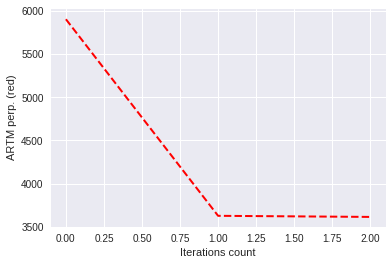

In [294]:
# посмотрим, что стало с моделью
# если график сильно падал на последних итерациях, то можно прогнать обучение ещё несколько раз 
# (не добавляя другие регуляризаторы)
print_measures(model_artm)

Добавим регуляризаторы разреженности тем и документов.

Их рекомендуется добавлять после того, как модель уже как-то сошлась. После добавления их рекомендуется постепенно уменьшать, чтобы усиливать разреживание. Их можно применять не ко всем темам, чтобы в каких-то темах собрались все стоп-слова.

Можно добавлять их вместе или по отдельности.

In [0]:
model_artm.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.15, 
                                                            topic_names=['topic_{}'.format(i) for i in range(1, 200)],
                                                            ))
model_artm.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.15, 
                                                              topic_names=['topic_{}'.format(i) for i in range(1, 200)]))

In [0]:
model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=1)

In [0]:
# будем постепенно увеличивать значения этих регуляризаторов
phi_tau = model_artm.regularizers['SparsePhi'].tau
theta_tau = model_artm.regularizers['SparseTheta'].tau

for i in range(10):
    model_artm.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*0.5))
    model_artm.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.1))
    
    model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)
    

Sparsity Phi: 0.803 ARTM)
Sparsity Theta: 0.168 (ARTM)
Kernel contrast: 0.270 (ARTM)
Kernel purity: 0.334 (ARTM)
Perplexity: 1781.838 (ARTM)


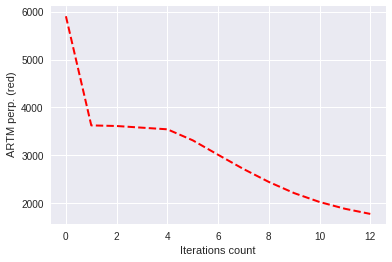

In [297]:
# посмотрим на качество
print_measures(model_artm)

Перплексия должна снижаться. Если график выровнился и больше не меняется - модель сошлась. Обычно перплексия хорошей модели около 200-1000. На таком небольшом количестве данных возможно такого значения достичь не получится. #2175.539 - значение с семинара

Перплексия меньше, чем на семинаре, получилась при отсеивании слишком частотных и слишком редких слов (1781.838). То есть добавлением в фильтр словаря следующих параметров:

min_tf=10, max_tf=2000, min_df_rate=0.01

Вдобавок к этому я экспериментировала с параметром тау в обоих регуляризаторах. В DecorrelatorPhiRegularizer я увеличила тау до дефолтного значения 1. А в SmoothSparsePhiRegularizer я уменьшила до -0.05. То есть я увеличила декорреляцию и разреживание.

In [304]:
# посмотрим на темы
for topic_name in model_artm.topic_names[:50]:
    print(topic_name + ': ')
    try:
        for x in model_artm.score_tracker['TopTokensScore_1'].last_tokens[topic_name]:
            print(x)
        print('---------')
    
    except KeyError: # можно перекрутить параметры и некоторые темы окажутся пустыми
        continue

topic_0: 
кат
курс
университет
квеста
новогодний
зарегистрироваться
ноябрь
приз
участие
опрос
---------
topic_1: 
атака
уязвимость
письмо
защита
злоумышленник
вредоносный
безопасность
информационный
хакер
linkedin
---------
topic_2: 
вообще
ты
экран
лично
курс
мама
сколько
совсем
начинать
ну
---------
topic_3: 
google
amazon
голосовой
голос
помощник
оценка
развитие
конкурс
facebook
марк
---------
topic_4: 
инструкция
регистр
архитектура
процессор
ассемблер
стек
компилятор
ядро
задержка
intel
---------
topic_5: 
лицо
деятельность
предприятие
персональный
чувство
гражданин
заказчик
личный
отношение
жизнь
---------
topic_6: 
сигнал
частота
искажение
характеристика
стандарт
диапазон
приёмник
частотный
помеха
воспроизведение
---------
topic_7: 
https
бот
http
загрузка
уведомление
telegram
ssl
сертификат
раздел
nginx
---------
topic_8: 
доклад
конференция
текстовый
тема
текст
рассказать
участник
докладчик
разбор
иван
---------
topic_9: 
развитие
век
книга
будущее
современный
автор
стратегиче

6) для самой хорошей модели в отдельной ячейке напечатайте 3 хороших (на ваш вкус) темы

Я напечатала чуть больше для наглядности.

In [306]:
from itertools import chain

a = model_artm.topic_names
best_topics = list(chain([a[6]], [a[1]], [a[49]], [a[46]]))

for topic_name in best_topics:
    print(topic_name + ': ')
    for x in model_artm.score_tracker['TopTokensScore_1'].last_tokens[topic_name]:
        print(x)
    print('---------')

topic_6: 
сигнал
частота
искажение
характеристика
стандарт
диапазон
приёмник
частотный
помеха
воспроизведение
---------
topic_1: 
атака
уязвимость
письмо
защита
злоумышленник
вредоносный
безопасность
информационный
хакер
linkedin
---------
topic_49: 
кабель
адаптер
сигнал
захват
соединение
wifi
передача
пропускной
задержка
usb
---------
topic_46: 
обучение
признак
слой
машинный
нейронный
мозг
нейрон
сигнал
обучать
распознавание
---------
